# Machine Learning Exercises
**Exercise 1
You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

#1.Load the dataset ../data/housing-data.csv
#2.plot the histograms for each feature
#3.create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
#4.create a linear regression model in Keras with the appropriate number of inputs and output
#5.split the data into train and test with a 20% test size
#6.train the model on the training set and check its accuracy on training and test set
#7.how's your model doing? Is the loss growing smaller?
#8.try to improve your model with these experiments:
#9.normalize the input features with one of the rescaling techniques mentioned above
#10.use a different value for the learning rate of your model
#11.use a different optimizer
#12.once you're satisfied with training, check the R2score on the test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing-data.csv')

In [3]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


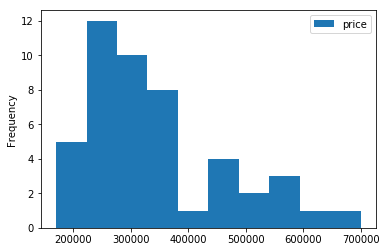

In [14]:
# PLOTTING HISTOGRAMS
df.plot(x ='sqft',y='price',kind='hist')
plt.xlabel='sqft'
plt.ylabel ='price'

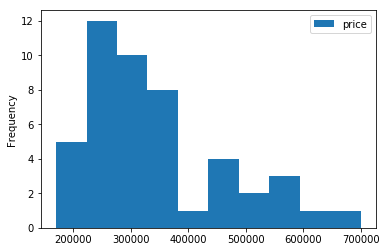

In [7]:
df.plot(x ='bdrms',y='price',kind='hist')

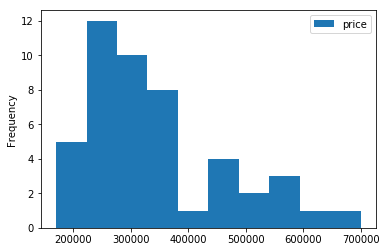

In [16]:
df.plot(x ='age',y='price',kind='hist')

In [18]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

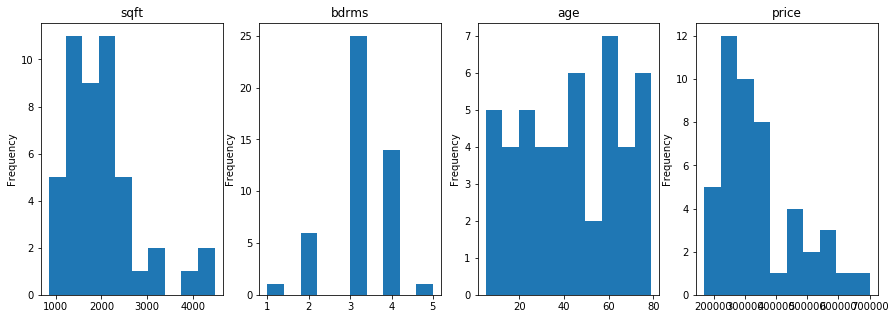

In [30]:
# OR Histograms for each feature can also be formed using for loop

plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)

    # it is important to plot a histogram so we can see the common values and we get visual check on range of the feature

In [35]:
X = df[['sqft', 'bdrms', 'age']].values
y = df[['price']].values

# .values create an array of all values

In [36]:
y

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500],
       [239999],
       [347000],
       [329999],
       [699900],
       [259900],
       [449900],
       [299900],
       [199900],
       [499998],
       [599000],
       [252900],
       [255000],
       [242900],
       [259900],
       [573900],
       [249900],
       [464500],
       [469000],
       [475000],
       [299900],
       [349900],
       [169900],
       [314900],
       [579900],
       [285900],
       [249900],
       [229900],
       [345000],
       [549000],
       [287000],
       [368500],
       [329900],
       [314000],
       [299000],
       [179900],
       [299900],
       [239500]], dtype=int64)

In [37]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [38]:
# BUILDING A MODEL WITH KERAS

from keras.models import Sequential  # sequential because we will be adding elements to this model in a sequence. 
from keras.layers import Dense    # no. of layers in a neural network   
from keras.optimizers import Adam, SGD # helps to change the values of w and b to get to the minimum cost.

Using TensorFlow backend.


In [41]:
#create a linear regression model in Keras with the appropriate number of inputs and output

model = Sequential()
model.add(Dense(1, input_shape=(3,)))  
# only 1 middle layer or 1 output cause we are predicting only 1 variabel(Price) and 3 inputs values as we have 3 i/p features
#Pass an input_shape argument to the first layer. 
#This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). 
#In input_shape, the batch dimension is not included.

model.compile(Adam(lr=0.8),'mean_squared_error')

# lr = Linear Regression
# Adam(lr=0.8) = optimizer
# Adam  = A method for stochastic optimization

In [43]:
from sklearn.model_selection import train_test_split

# split the data into train and test with a 20% test size

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)

In [46]:
len(X_train)

37

In [48]:
len(X)

47

In [50]:
# train the model on the training set and check its accuracy on training and test set

model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
37/37 [==============================] - 0s 189us/step - loss: 137590115134.2703
Epoch 2/10
37/37 [==============================] - 0s 108us/step - loss: 134979497651.8919
Epoch 3/10
37/37 [==============================] - 0s 145us/step - loss: 132410613981.4054
Epoch 4/10
37/37 [==============================] - 0s 135us/step - loss: 129781380953.9459
Epoch 5/10
37/37 [==============================] - 0s 135us/step - loss: 127343766334.2703
Epoch 6/10
37/37 [==============================] - 0s 108us/step - loss: 124768438438.0541
Epoch 7/10
37/37 [==============================] - 0s 162us/step - loss: 122342369446.0541
Epoch 8/10
37/37 [==============================] - 0s 135us/step - loss: 119817830842.8108
Epoch 9/10
37/37 [==============================] - 0s 135us/step - loss: 117468283433.5135
Epoch 10/10
37/37 [==============================] - 0s 108us/step - loss: 115048257369.9459


In [53]:
# from above we see that the loss is going down
# also the loss is such a big number ,but loss =( predicted values - actual values) and we are predicting prices

df['price'].max()

699900

In [54]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [73]:
# scaling features

df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

# 1e5 =100k
# scales matching to their respective feature mean value


In [74]:
# now train_test_split again

X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))  

model.compile(Adam(lr=0.8),'mean_squared_error')


model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
37/37 [==============================] - 0s 3ms/step - loss: 8.7931
Epoch 2/10
37/37 [==============================] - 0s 449us/step - loss: 11.0487
Epoch 3/10
37/37 [==============================] - 0s 162us/step - loss: 11.8656
Epoch 4/10
37/37 [==============================] - 0s 162us/step - loss: 1.1357
Epoch 5/10
37/37 [==============================] - 0s 189us/step - loss: 5.9253
Epoch 6/10
37/37 [==============================] - 0s 216us/step - loss: 0.5260
Epoch 7/10
37/37 [==============================] - 0s 108us/step - loss: 4.9315
Epoch 8/10
37/37 [==============================] - 0s 162us/step - loss: 0.8722
Epoch 9/10
37/37 [==============================] - 0s 135us/step - loss: 2.6761
Epoch 10/10
37/37 [==============================] - 0s 189us/step - loss: 0.6162


In [80]:
# thus we see that the loss has been scaled to lower values

# now, calculating R2 Score

from sklearn.metrics import r2_score

In [83]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-0.033
The R2 score on the Test set is:	-0.175


In [86]:
# negleting the signs we see that test data performs much better than training set as required

